<a href="https://colab.research.google.com/github/Riturajseal2001/TECH-A-THON-Pull_Request/blob/master/PricePredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Importing libraries***

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split


# *Converting .csv into data frames using Pandas library*

In [ ]:
df = pd.read_csv('./train.csv')
# Removing price_range from DataFrame for test data
X = df[:].drop(['price_range'], axis=1)
# Creating DataFrame for testing the predictions
y = df['price_range']
# DataFrame against which predictions will be made
df1 = pd.read_csv('test.csv')

In [ ]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


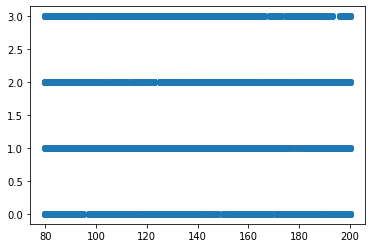

In [ ]:
plt.scatter(X['mobile_wt'],y)

# *Splitting test and train data for training the model*

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.65)

# Declaring variables for accuracy testing and plotting accuracy for different regularizations in Support Vector *Classifier*

In [ ]:
acc = 0 
i1 = 0
output = []
acc_list = []
C_list = []

# *Training the model for different regularization values*

In [ ]:

inp = df1.drop(['id'], axis=1)
for i in range(1,150):
    model = SVC(C = i,kernel='poly',break_ties=True)
    model.fit(X_train,y_train)
    if acc < model.score(X_test,y_test)*100:
        acc = model.score(X_test,y_test)*100
        i1 = i
        df1['predicted_price'] = model.predict(inp)
    acc_list.append(model.score(X_test,y_test)*100)
    C_list.append(i)
print("Accuracy of trained model in %: ",acc)

Accuracy of trained model in %:  97.28571428571429


# *Plotting regularization vs accuracy results*
This graph shows the variation in accuracy for different regularization values.

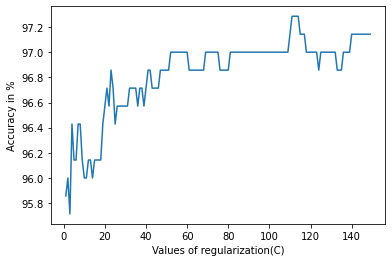

In [ ]:
plt.ylabel('Accuracy in %')
plt.xlabel('Values of regularization(C)')
plt.plot(C_list,acc_list)
plt.show()

# *Converting predicted price range into csv format*

In [ ]:
df1.to_csv('output.csv')
df1

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,predicted_price
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,3
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,3
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0,2
996,997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0,2
